# NYTimes Archives - March,2022

- Data exploration of the articles published during the month of 2022
Accessing the articles through New York Times Archive API. 

The New York Times API can be accessed by creating a developers account at https://developer.nytimes.com/ 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json 
from requests.exceptions import HTTPError
import urllib3
import os
import time
import datetime
import dateutil
#to specify date range
from dateutil.relativedelta import relativedelta 
from configparser import ConfigParser

In [2]:
config = ConfigParser()
config.read(r'C:/Users/NAMEERA/Desktop/Data Science/API/nyt.cfg')
API_KEY = config.get('NYT','Key')

Using the confifuration parser module could help us in hiding the API Key that must remain private. 

In [3]:
url= 'https://api.nytimes.com/svc/archive/v1/2022/3.json?api-key='+API_KEY
response = requests.get(url).json()

In [4]:
#to check outer most keys
list(response)

['copyright', 'response']

In [5]:
#we need the content present in response into a dataframe
articles =[]
for i in  response['response']['docs']:
    articles.append(i)


In [6]:
df = pd.DataFrame(articles)
df.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
0,The Ukraine war has revealed the Putin regime’...,https://www.nytimes.com/2022/02/28/opinion/put...,The Ukraine war has revealed the Putin regime’...,"Beware, Vladimir Putin: Spring is coming. And ...",A,22,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Russia Is a Potemkin Superpower', 'k...","[{'name': 'subject', 'value': 'Russian Invasio...",2022-03-01T00:00:05+0000,article,OpEd,Opinion,"{'original': 'By Paul Krugman', 'person': [{'f...",Op-Ed,nyt://article/60caff94-4aaa-5bf7-88ae-61fece51...,882,nyt://article/60caff94-4aaa-5bf7-88ae-61fece51...,NaN
1,The first election night of the 2022 midterms ...,https://www.nytimes.com/2022/02/28/us/politics...,The first election night of the 2022 midterms ...,Follow our live updates on the Texas primary e...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'What We’re Watching in Tuesday’s Tex...,"[{'name': 'subject', 'value': 'United States P...",2022-03-01T00:05:41+0000,article,Politics,U.S.,{'original': 'By Leah Askarinam and Blake Houn...,News,nyt://article/b0e30a78-8b30-5d51-a5cf-7d42c479...,1411,nyt://article/b0e30a78-8b30-5d51-a5cf-7d42c479...,Politics
2,The speech was originally going to center prim...,https://www.nytimes.com/2022/02/28/us/politics...,The speech was originally going to center prim...,WASHINGTON — President Biden will use his firs...,A,18,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'In State of the Union, Biden Will Fo...","[{'name': 'subject', 'value': 'United States E...",2022-03-01T00:05:58+0000,article,Washington,U.S.,"{'original': 'By Michael D. Shear', 'person': ...",News,nyt://article/7f1b9401-cdcf-5919-8894-03468165...,1079,nyt://article/7f1b9401-cdcf-5919-8894-03468165...,Politics
3,The participation of Representatives Marjorie ...,https://www.nytimes.com/2022/02/28/us/politics...,The participation of Representatives Marjorie ...,WASHINGTON — Republican congressional leaders ...,A,17,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'G.O.P. Leaders Condemn Lawmakers’ Ap...,"[{'name': 'subject', 'value': 'United States P...",2022-03-01T00:06:44+0000,article,Washington,U.S.,{'original': 'By Jonathan Weisman and Annie Ka...,News,nyt://article/9b1a4ff4-fd6b-50b2-ae26-a50dd4d4...,1344,nyt://article/9b1a4ff4-fd6b-50b2-ae26-a50dd4d4...,Politics
4,"As a financier, he amassed a fortune that he s...",https://www.nytimes.com/2022/02/28/us/politics...,"As a financier, he amassed a fortune that he s...","Richard C. Blum, a financier and major donor t...",A,21,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Richard Blum, Political Donor and Hu...","[{'name': 'subject', 'value': 'United States P...",2022-03-01T00:11:29+0000,article,Obits,U.S.,"{'original': 'By Alex Traub', 'person': [{'fir...",Obituary (Obit),nyt://article/9edba9b7-d940-5ce4-ac3b-2fc97179...,676,nyt://article/9edba9b7-d940-5ce4-ac3b-2fc97179...,Politics


These articles parsed from the Archive API of NYT is for the month of March,2022. 

The scope of this project is to analyse the headlines of all the articles published during March. Hence, the next step is to filter through the dataframe for articles that explicitly do have a headline.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4310 entries, 0 to 4309
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   abstract          4310 non-null   object
 1   web_url           4310 non-null   object
 2   snippet           4310 non-null   object
 3   lead_paragraph    4310 non-null   object
 4   print_section     2497 non-null   object
 5   print_page        2497 non-null   object
 6   source            4310 non-null   object
 7   multimedia        4310 non-null   object
 8   headline          4310 non-null   object
 9   keywords          4310 non-null   object
 10  pub_date          4310 non-null   object
 11  document_type     4310 non-null   object
 12  news_desk         4310 non-null   object
 13  section_name      4310 non-null   object
 14  byline            4310 non-null   object
 15  type_of_material  4310 non-null   object
 16  _id               4310 non-null   object
 17  word_count    

In [8]:
df_main = df[['pub_date','web_url','headline','abstract','snippet','keywords','document_type','section_name','news_desk','subsection_name']]
df_main.head(10)

,pub_date,web_url,headline,abstract,snippet,keywords,document_type,section_name,news_desk,subsection_name
0,2022-03-01T00:00:05+0000,https://www.nytimes.com/2022/02/28/opinion/put...,"{'main': 'Russia Is a Potemkin Superpower', 'k...",The Ukraine war has revealed the Putin regime’...,The Ukraine war has revealed the Putin regime’...,"[{'name': 'subject', 'value': 'Russian Invasio...",article,Opinion,OpEd,NaN
1,2022-03-01T00:05:41+0000,https://www.nytimes.com/2022/02/28/us/politics...,{'main': 'What We’re Watching in Tuesday’s Tex...,The first election night of the 2022 midterms ...,The first election night of the 2022 midterms ...,"[{'name': 'subject', 'value': 'United States P...",article,U.S.,Politics,Politics
2,2022-03-01T00:05:58+0000,https://www.nytimes.com/2022/02/28/us/politics...,"{'main': 'In State of the Union, Biden Will Fo...",The speech was originally going to center prim...,The speech was originally going to center prim...,"[{'name': 'subject', 'value': 'United States E...",article,U.S.,Washington,Politics
3,2022-03-01T00:06:44+0000,https://www.nytimes.com/2022/02/28/us/politics...,{'main': 'G.O.P. Leaders Condemn Lawmakers’ Ap...,The participation of Representatives Marjorie ...,The participation of Representatives Marjorie ...,"[{'name': 'subject', 'value': 'United States P...",article,U.S.,Washington,Politics
4,2022-03-01T00:11:29+0000,https://www.nytimes.com/2022/02/28/us/politics...,"{'main': 'Richard Blum, Political Donor and Hu...","As a financier, he amassed a fortune that he s...","As a financier, he amassed a fortune that he s...","[{'name': 'subject', 'value': 'United States P...",article,U.S.,Obits,Politics
5,2022-03-01T00:11:53+0000,https://www.nytimes.com/2022/02/28/world/europ...,{'main': 'A few members of the Russian Parliam...,"In a rare show of dissent, three deputies of t...","In a rare show of dissent, three deputies of t...","[{'name': 'subject', 'value': 'Russian Invasio...",article,World,Foreign,Europe
6,2022-03-01T00:19:09+0000,https://www.nytimes.com/2022/02/28/us/politics...,{'main': 'Republicans Block Abortion Rights Me...,"With a Supreme Court ruling looming, both part...","With a Supreme Court ruling looming, both part...","[{'name': 'subject', 'value': 'Law and Legisla...",article,U.S.,Washington,Politics
7,2022-03-01T00:26:13+0000,https://www.nytimes.com/2022/02/28/us/politics...,"{'main': 'Bracing for Biden and Protests, Offi...","A security fence, National Guard troops and mo...","A security fence, National Guard troops and mo...","[{'name': 'subject', 'value': 'Storming of the...",article,U.S.,Washington,Politics
8,2022-03-01T00:27:11+0000,https://www.nytimes.com/2022/02/28/world/europ...,{'main': 'The U.S. expels 12 Russian diplomats...,The move is part of a larger effort to isolate...,The move is part of a larger effort to isolate...,"[{'name': 'subject', 'value': 'Russian Invasio...",article,World,Foreign,Europe
9,2022-03-01T00:31:13+0000,https://www.nytimes.com/2022/02/28/business/uk...,{'main': 'Ukraine Gets $22 Million in Crypto D...,Cryptocurrency has provided a way for investor...,Cryptocurrency has provided a way for investor...,"[{'name': 'subject', 'value': 'Russian Invasio...",article,Business Day,Business,NaN


<AxesSubplot:>

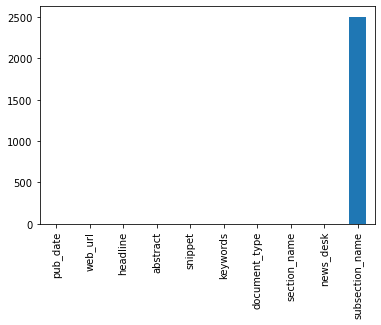

In [9]:
df_main.isna().sum().plot(kind='bar')

In [10]:
df_main['pub_date'] = pd.to_datetime(df_main['pub_date'])

<ipython-input-10-c37fba179e50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['pub_date'] = pd.to_datetime(df_main['pub_date'])


In [11]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4310 entries, 0 to 4309
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   pub_date         4310 non-null   datetime64[ns, UTC]
 1   web_url          4310 non-null   object             
 2   headline         4310 non-null   object             
 3   abstract         4310 non-null   object             
 4   snippet          4310 non-null   object             
 5   keywords         4310 non-null   object             
 6   document_type    4310 non-null   object             
 7   section_name     4310 non-null   object             
 8   news_desk        4310 non-null   object             
 9   subsection_name  1803 non-null   object             
dtypes: datetime64[ns, UTC](1), object(9)
memory usage: 336.8+ KB


Since we require only the main headline, we can extract it from the dictionary of keys and values from the headlines column. 

In [12]:
headline = df_main['headline'].apply(pd.Series)
headline

,main,kicker,content_kicker,print_headline,name,seo,sub
0,Russia Is a Potemkin Superpower,Paul Krugman,None,Russia Is a Potemkin Superpower,None,None,None
1,What We’re Watching in Tuesday’s Texas Primary...,None,None,,None,None,None
2,"In State of the Union, Biden Will Focus on Eco...",None,None,State of the Union to Focus on Economic Recove...,None,None,None
3,G.O.P. Leaders Condemn Lawmakers’ Appearance a...,None,None,Top Republicans Condemn Legislators’ Extremist...,None,None,None
4,"Richard Blum, Political Donor and Husband of S...",None,None,"Richard Blum, 86, Investor And a Senator’s Hu...",None,None,None
...,...,...,...,...,...,...,...
4305,Vegetarian Pastas I’m Craving,None,None,,None,None,None
4306,Many Teens Report Emotional and Physical Abuse...,None,None,,None,None,None
4307,Hugs to Boring,on tech newsletter,None,,None,None,None
4308,"Review: In ‘I Agree to the Terms,’ It’s Rainin...",None,None,,None,None,None


In [13]:
headline['main']

0                         Russia Is a Potemkin Superpower
1       What We’re Watching in Tuesday’s Texas Primary...
2       In State of the Union, Biden Will Focus on Eco...
3       G.O.P. Leaders Condemn Lawmakers’ Appearance a...
4       Richard Blum, Political Donor and Husband of S...
                              ...                        
4305                        Vegetarian Pastas I’m Craving
4306    Many Teens Report Emotional and Physical Abuse...
4307                                       Hugs to Boring
4308    Review: In ‘I Agree to the Terms,’ It’s Rainin...
4309    What Students Are Saying About How Social Medi...
Name: main, Length: 4310, dtype: object

In [14]:
df_main['headline']= headline['main']

<ipython-input-14-227f9761312b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['headline']= headline['main']


In [15]:
df_main.head()

,pub_date,web_url,headline,abstract,snippet,keywords,document_type,section_name,news_desk,subsection_name
0,2022-03-01 00:00:05+00:00,https://www.nytimes.com/2022/02/28/opinion/put...,Russia Is a Potemkin Superpower,The Ukraine war has revealed the Putin regime’...,The Ukraine war has revealed the Putin regime’...,"[{'name': 'subject', 'value': 'Russian Invasio...",article,Opinion,OpEd,NaN
1,2022-03-01 00:05:41+00:00,https://www.nytimes.com/2022/02/28/us/politics...,What We’re Watching in Tuesday’s Texas Primary...,The first election night of the 2022 midterms ...,The first election night of the 2022 midterms ...,"[{'name': 'subject', 'value': 'United States P...",article,U.S.,Politics,Politics
2,2022-03-01 00:05:58+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"In State of the Union, Biden Will Focus on Eco...",The speech was originally going to center prim...,The speech was originally going to center prim...,"[{'name': 'subject', 'value': 'United States E...",article,U.S.,Washington,Politics
3,2022-03-01 00:06:44+00:00,https://www.nytimes.com/2022/02/28/us/politics...,G.O.P. Leaders Condemn Lawmakers’ Appearance a...,The participation of Representatives Marjorie ...,The participation of Representatives Marjorie ...,"[{'name': 'subject', 'value': 'United States P...",article,U.S.,Washington,Politics
4,2022-03-01 00:11:29+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"Richard Blum, Political Donor and Husband of S...","As a financier, he amassed a fortune that he s...","As a financier, he amassed a fortune that he s...","[{'name': 'subject', 'value': 'United States P...",article,U.S.,Obits,Politics


In [16]:
keys = {'values':[]}
article = response['response']['docs']
for a in article:
    keywords = [keyword['value'] for keyword in a['keywords'] if keyword['name'] == 'subject']
    keys['values'].append(keywords)


In [17]:
keys = pd.DataFrame(keys)

In [18]:
keys

,values
0,"[Russian Invasion of Ukraine (2022), Ruble (Cu..."
1,"[United States Politics and Government, intern..."
2,"[United States Economy, United States Internat..."
3,"[United States Politics and Government, Anti-S..."
4,"[United States Politics and Government, Deaths..."
...,...
4305,"[Cooking and Cookbooks, Content Type: Service,..."
4306,"[Anxiety and Stress, Teenagers and Adolescence..."
4307,"[internal-sub-only-nl, Computers and the Inter..."
4308,[Theater]


In [19]:
df_main['keywords'] = keys['values']
df_main.head()

<ipython-input-19-421fc5016dda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['keywords'] = keys['values']


,pub_date,web_url,headline,abstract,snippet,keywords,document_type,section_name,news_desk,subsection_name
0,2022-03-01 00:00:05+00:00,https://www.nytimes.com/2022/02/28/opinion/put...,Russia Is a Potemkin Superpower,The Ukraine war has revealed the Putin regime’...,The Ukraine war has revealed the Putin regime’...,"[Russian Invasion of Ukraine (2022), Ruble (Cu...",article,Opinion,OpEd,NaN
1,2022-03-01 00:05:41+00:00,https://www.nytimes.com/2022/02/28/us/politics...,What We’re Watching in Tuesday’s Texas Primary...,The first election night of the 2022 midterms ...,The first election night of the 2022 midterms ...,"[United States Politics and Government, intern...",article,U.S.,Politics,Politics
2,2022-03-01 00:05:58+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"In State of the Union, Biden Will Focus on Eco...",The speech was originally going to center prim...,The speech was originally going to center prim...,"[United States Economy, United States Internat...",article,U.S.,Washington,Politics
3,2022-03-01 00:06:44+00:00,https://www.nytimes.com/2022/02/28/us/politics...,G.O.P. Leaders Condemn Lawmakers’ Appearance a...,The participation of Representatives Marjorie ...,The participation of Representatives Marjorie ...,"[United States Politics and Government, Anti-S...",article,U.S.,Washington,Politics
4,2022-03-01 00:11:29+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"Richard Blum, Political Donor and Husband of S...","As a financier, he amassed a fortune that he s...","As a financier, he amassed a fortune that he s...","[United States Politics and Government, Deaths...",article,U.S.,Obits,Politics


<AxesSubplot:>

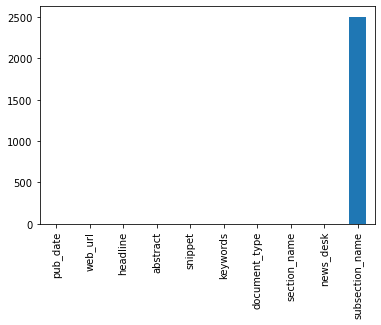

In [20]:
df_main.isna().sum().plot(kind='bar')

In [21]:
(df_main['subsection_name'].isna().sum())/4310

0.5816705336426914

Since 58% of the values in the subsection name variable are missing, it would be best to drop the column. Moreover, it is of no relevance to this current project. 

In [22]:
df_main.drop('subsection_name',inplace=True,axis =1)

C:\Users\NAMEERA\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df_main

,pub_date,web_url,headline,abstract,snippet,keywords,document_type,section_name,news_desk
0,2022-03-01 00:00:05+00:00,https://www.nytimes.com/2022/02/28/opinion/put...,Russia Is a Potemkin Superpower,The Ukraine war has revealed the Putin regime’...,The Ukraine war has revealed the Putin regime’...,"[Russian Invasion of Ukraine (2022), Ruble (Cu...",article,Opinion,OpEd
1,2022-03-01 00:05:41+00:00,https://www.nytimes.com/2022/02/28/us/politics...,What We’re Watching in Tuesday’s Texas Primary...,The first election night of the 2022 midterms ...,The first election night of the 2022 midterms ...,"[United States Politics and Government, intern...",article,U.S.,Politics
2,2022-03-01 00:05:58+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"In State of the Union, Biden Will Focus on Eco...",The speech was originally going to center prim...,The speech was originally going to center prim...,"[United States Economy, United States Internat...",article,U.S.,Washington
3,2022-03-01 00:06:44+00:00,https://www.nytimes.com/2022/02/28/us/politics...,G.O.P. Leaders Condemn Lawmakers’ Appearance a...,The participation of Representatives Marjorie ...,The participation of Representatives Marjorie ...,"[United States Politics and Government, Anti-S...",article,U.S.,Washington
4,2022-03-01 00:11:29+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"Richard Blum, Political Donor and Husband of S...","As a financier, he amassed a fortune that he s...","As a financier, he amassed a fortune that he s...","[United States Politics and Government, Deaths...",article,U.S.,Obits
...,...,...,...,...,...,...,...,...,...
4305,2022-03-31 17:00:04+00:00,https://www.nytimes.com/2022/03/31/dining/vege...,Vegetarian Pastas I’m Craving,"After some time away from home, nothing satisf...","After some time away from home, nothing satisf...","[Cooking and Cookbooks, Content Type: Service,...",article,Food,Dining
4306,2022-03-31 17:00:10+00:00,https://www.nytimes.com/2022/03/31/us/covid-me...,Many Teens Report Emotional and Physical Abuse...,New data on teen mental health during the pand...,New data on teen mental health during the pand...,"[Anxiety and Stress, Teenagers and Adolescence...",article,U.S.,Science
4307,2022-03-31 17:01:32+00:00,https://www.nytimes.com/2022/03/31/technology/...,Hugs to Boring,Don’t underestimate the tech that makes your e...,Don’t underestimate the tech that makes your e...,"[internal-sub-only-nl, Computers and the Inter...",article,Technology,Business
4308,2022-03-31 17:04:43+00:00,https://www.nytimes.com/2022/03/31/theater/i-a...,"Review: In ‘I Agree to the Terms,’ It’s Rainin...",The Builders Association explores the world of...,The Builders Association explores the world of...,[Theater],article,Theater,Weekend


In [24]:
#to view unique sections  
df_main['section_name'].unique()

array(['Opinion', 'U.S.', 'World', 'Business Day', 'Science', 'Sports',
       'Crosswords & Games', 'New York', 'Briefing', 'Today’s Paper',
       'Corrections', 'Arts', 'The Learning Network', 'Style', 'Books',
       'Magazine', 'Climate', 'Real Estate', 'Travel', 'Theater', 'Food',
       'Podcasts', 'Movies', 'T Magazine', 'Health', 'Technology',
       'Times Insider', 'Well', 'Fashion & Style', 'Your Money',
       'Smarter Living', 'Obituaries', 'The Upshot', 'Reader Center',
       'Automobiles', 'Sunday Review', 'Homepage', 'Education'],
      dtype=object)

# Data Analysis 

In [25]:
df_us_world = df_main.loc[(df_main['section_name']=='U.S.') | (df_main['section_name']=='World')]

In [26]:
df_us_world

,pub_date,web_url,headline,abstract,snippet,keywords,document_type,section_name,news_desk
1,2022-03-01 00:05:41+00:00,https://www.nytimes.com/2022/02/28/us/politics...,What We’re Watching in Tuesday’s Texas Primary...,The first election night of the 2022 midterms ...,The first election night of the 2022 midterms ...,"[United States Politics and Government, intern...",article,U.S.,Politics
2,2022-03-01 00:05:58+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"In State of the Union, Biden Will Focus on Eco...",The speech was originally going to center prim...,The speech was originally going to center prim...,"[United States Economy, United States Internat...",article,U.S.,Washington
3,2022-03-01 00:06:44+00:00,https://www.nytimes.com/2022/02/28/us/politics...,G.O.P. Leaders Condemn Lawmakers’ Appearance a...,The participation of Representatives Marjorie ...,The participation of Representatives Marjorie ...,"[United States Politics and Government, Anti-S...",article,U.S.,Washington
4,2022-03-01 00:11:29+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"Richard Blum, Political Donor and Husband of S...","As a financier, he amassed a fortune that he s...","As a financier, he amassed a fortune that he s...","[United States Politics and Government, Deaths...",article,U.S.,Obits
5,2022-03-01 00:11:53+00:00,https://www.nytimes.com/2022/02/28/world/europ...,A few members of the Russian Parliament speak ...,"In a rare show of dissent, three deputies of t...","In a rare show of dissent, three deputies of t...",[Russian Invasion of Ukraine (2022)],article,World,Foreign
...,...,...,...,...,...,...,...,...,...
4290,2022-03-31 15:56:54+00:00,https://www.nytimes.com/2022/03/31/us/florida-...,Powerful Storm Kills at Least 2 in Florida Pan...,"At least two others were injured, the authorit...","At least two others were injured, the authorit...","[Tornadoes, Weather]",article,U.S.,Express
4291,2022-03-31 16:00:43+00:00,https://www.nytimes.com/2022/03/31/world/europ...,Macron Goes on Defensive Over Use of McKinsey ...,President Emmanuel Macron’s opponents have cri...,President Emmanuel Macron’s opponents have cri...,"[Politics and Government, Government Contracts...",article,World,Foreign
4301,2022-03-31 16:51:07+00:00,https://www.nytimes.com/2022/03/31/us/politics...,"Graham, Once a Backer of Jackson, Says He Will...",Senator Lindsey Graham voted last year to conf...,Senator Lindsey Graham voted last year to conf...,"[Appointments and Executive Changes, United St...",article,U.S.,Washington
4304,2022-03-31 16:57:34+00:00,https://www.nytimes.com/2022/03/31/world/europ...,Ukraine has asked for ‘security guarantees’ to...,Ukraine’s request for other countries to guara...,Ukraine’s request for other countries to guara...,[Russian Invasion of Ukraine (2022)],article,World,Foreign


In [27]:
df_us_world.to_csv('US_World.csv')

In [28]:
df.to_csv('original data_march.csv')
df_main.to_csv('main data.csv')

Saving these dataframes as CSV file for future analysis.

<AxesSubplot:>

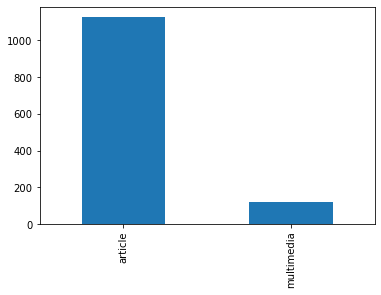

In [29]:
df_us_world['document_type'].value_counts().plot(kind='bar')

In [30]:
df_us_world['news_desk'].unique()

array(['Politics', 'Washington', 'Obits', 'Foreign', 'Investigative',
       'Express', 'Graphics', 'National', 'Science', 'Upshot', 'U.S.', '',
       'World', 'Business', 'NYTNow', 'Metro', 'Culture', 'Video'],
      dtype=object)

In [31]:
df_us_world['section_name'].value_counts()

World    625
U.S.     624
Name: section_name, dtype: int64

<AxesSubplot:xlabel='section_name,news_desk'>

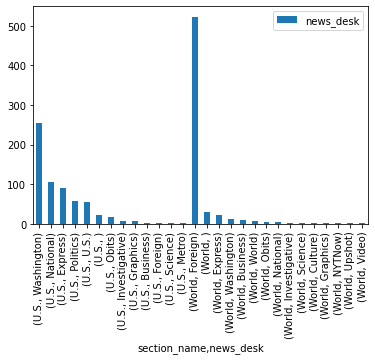

In [32]:
df_us_world.groupby('section_name')['news_desk'].value_counts().plot(kind='bar',legend=True,rot=90)

In [33]:
df_us_world.groupby('section_name')['news_desk'].value_counts()

section_name  news_desk    
U.S.          Washington       255
              National         106
              Express           90
              Politics          58
              U.S.              55
                                21
              Obits             17
              Investigative      7
              Graphics           6
              Business           3
              Foreign            3
              Science            2
              Metro              1
World         Foreign          523
                                29
              Express           22
              Washington        13
              Business           9
              World              7
              Obits              5
              National           4
              Investigative      3
              Science            3
              Culture            2
              Graphics           2
              NYTNow             1
              Upshot             1
              Video        

The news desk alloted for World news has published 523 articles for the 'Foreign' category. However, we do not know what headlines this category comprises of. Assuming that this news is international in general, the number of news articles 79% higher than the national category. 

The number of total news articles for the U.S. and the rest of the world is approx. the same. Given that NYT is a U.S. based organisation, for obvious reasons the focus is given to national news. 

I would like to focus this project on the sentiment analysis of the headlines published respectively for either of the categories of interest.

# Natural Language Processing 

Every human follows their own of code of conduct, form of communication and its understanding. Natural language processing, to my understanding so far is the computer's ability to interpret a human's style of communication (in this context). 

Sentiment analysis being a part of NLP helps in predicting insights withheld by the nuances of language used by one. 

There are several python libraries that help us in predicting emotions as +ve or -ve like TextBlob but it comes along with its own discripancies. 

The most primary step in machine learning is pre-processing data before modelling the same. Words that mean the same can be treated are distinct objects if it differs by a letter. For instance : MARVEL and Marvel would be treated as 2 distinct objects by the program. 

- Data Preprocessing 

In [34]:
df_us_world['headline']= df_us_world['headline'].str.lower()

<ipython-input-34-3e6535e2cef8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_world['headline']= df_us_world['headline'].str.lower()


In [35]:
df_us_world

,pub_date,web_url,headline,abstract,snippet,keywords,document_type,section_name,news_desk
1,2022-03-01 00:05:41+00:00,https://www.nytimes.com/2022/02/28/us/politics...,what we’re watching in tuesday’s texas primary...,The first election night of the 2022 midterms ...,The first election night of the 2022 midterms ...,"[United States Politics and Government, intern...",article,U.S.,Politics
2,2022-03-01 00:05:58+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"in state of the union, biden will focus on eco...",The speech was originally going to center prim...,The speech was originally going to center prim...,"[United States Economy, United States Internat...",article,U.S.,Washington
3,2022-03-01 00:06:44+00:00,https://www.nytimes.com/2022/02/28/us/politics...,g.o.p. leaders condemn lawmakers’ appearance a...,The participation of Representatives Marjorie ...,The participation of Representatives Marjorie ...,"[United States Politics and Government, Anti-S...",article,U.S.,Washington
4,2022-03-01 00:11:29+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"richard blum, political donor and husband of s...","As a financier, he amassed a fortune that he s...","As a financier, he amassed a fortune that he s...","[United States Politics and Government, Deaths...",article,U.S.,Obits
5,2022-03-01 00:11:53+00:00,https://www.nytimes.com/2022/02/28/world/europ...,a few members of the russian parliament speak ...,"In a rare show of dissent, three deputies of t...","In a rare show of dissent, three deputies of t...",[Russian Invasion of Ukraine (2022)],article,World,Foreign
...,...,...,...,...,...,...,...,...,...
4290,2022-03-31 15:56:54+00:00,https://www.nytimes.com/2022/03/31/us/florida-...,powerful storm kills at least 2 in florida pan...,"At least two others were injured, the authorit...","At least two others were injured, the authorit...","[Tornadoes, Weather]",article,U.S.,Express
4291,2022-03-31 16:00:43+00:00,https://www.nytimes.com/2022/03/31/world/europ...,macron goes on defensive over use of mckinsey ...,President Emmanuel Macron’s opponents have cri...,President Emmanuel Macron’s opponents have cri...,"[Politics and Government, Government Contracts...",article,World,Foreign
4301,2022-03-31 16:51:07+00:00,https://www.nytimes.com/2022/03/31/us/politics...,"graham, once a backer of jackson, says he will...",Senator Lindsey Graham voted last year to conf...,Senator Lindsey Graham voted last year to conf...,"[Appointments and Executive Changes, United St...",article,U.S.,Washington
4304,2022-03-31 16:57:34+00:00,https://www.nytimes.com/2022/03/31/world/europ...,ukraine has asked for ‘security guarantees’ to...,Ukraine’s request for other countries to guara...,Ukraine’s request for other countries to guara...,[Russian Invasion of Ukraine (2022)],article,World,Foreign


In [36]:
df_us_world.reset_index(inplace=True)

In [37]:
df_us_world

,index,pub_date,web_url,headline,abstract,snippet,keywords,document_type,section_name,news_desk
0,1,2022-03-01 00:05:41+00:00,https://www.nytimes.com/2022/02/28/us/politics...,what we’re watching in tuesday’s texas primary...,The first election night of the 2022 midterms ...,The first election night of the 2022 midterms ...,"[United States Politics and Government, intern...",article,U.S.,Politics
1,2,2022-03-01 00:05:58+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"in state of the union, biden will focus on eco...",The speech was originally going to center prim...,The speech was originally going to center prim...,"[United States Economy, United States Internat...",article,U.S.,Washington
2,3,2022-03-01 00:06:44+00:00,https://www.nytimes.com/2022/02/28/us/politics...,g.o.p. leaders condemn lawmakers’ appearance a...,The participation of Representatives Marjorie ...,The participation of Representatives Marjorie ...,"[United States Politics and Government, Anti-S...",article,U.S.,Washington
3,4,2022-03-01 00:11:29+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"richard blum, political donor and husband of s...","As a financier, he amassed a fortune that he s...","As a financier, he amassed a fortune that he s...","[United States Politics and Government, Deaths...",article,U.S.,Obits
4,5,2022-03-01 00:11:53+00:00,https://www.nytimes.com/2022/02/28/world/europ...,a few members of the russian parliament speak ...,"In a rare show of dissent, three deputies of t...","In a rare show of dissent, three deputies of t...",[Russian Invasion of Ukraine (2022)],article,World,Foreign
...,...,...,...,...,...,...,...,...,...,...
1244,4290,2022-03-31 15:56:54+00:00,https://www.nytimes.com/2022/03/31/us/florida-...,powerful storm kills at least 2 in florida pan...,"At least two others were injured, the authorit...","At least two others were injured, the authorit...","[Tornadoes, Weather]",article,U.S.,Express
1245,4291,2022-03-31 16:00:43+00:00,https://www.nytimes.com/2022/03/31/world/europ...,macron goes on defensive over use of mckinsey ...,President Emmanuel Macron’s opponents have cri...,President Emmanuel Macron’s opponents have cri...,"[Politics and Government, Government Contracts...",article,World,Foreign
1246,4301,2022-03-31 16:51:07+00:00,https://www.nytimes.com/2022/03/31/us/politics...,"graham, once a backer of jackson, says he will...",Senator Lindsey Graham voted last year to conf...,Senator Lindsey Graham voted last year to conf...,"[Appointments and Executive Changes, United St...",article,U.S.,Washington
1247,4304,2022-03-31 16:57:34+00:00,https://www.nytimes.com/2022/03/31/world/europ...,ukraine has asked for ‘security guarantees’ to...,Ukraine’s request for other countries to guara...,Ukraine’s request for other countries to guara...,[Russian Invasion of Ukraine (2022)],article,World,Foreign


In [38]:
df_us_world.drop('index',axis=1,inplace=True)
df_us_world

C:\Users\NAMEERA\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,pub_date,web_url,headline,abstract,snippet,keywords,document_type,section_name,news_desk
0,2022-03-01 00:05:41+00:00,https://www.nytimes.com/2022/02/28/us/politics...,what we’re watching in tuesday’s texas primary...,The first election night of the 2022 midterms ...,The first election night of the 2022 midterms ...,"[United States Politics and Government, intern...",article,U.S.,Politics
1,2022-03-01 00:05:58+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"in state of the union, biden will focus on eco...",The speech was originally going to center prim...,The speech was originally going to center prim...,"[United States Economy, United States Internat...",article,U.S.,Washington
2,2022-03-01 00:06:44+00:00,https://www.nytimes.com/2022/02/28/us/politics...,g.o.p. leaders condemn lawmakers’ appearance a...,The participation of Representatives Marjorie ...,The participation of Representatives Marjorie ...,"[United States Politics and Government, Anti-S...",article,U.S.,Washington
3,2022-03-01 00:11:29+00:00,https://www.nytimes.com/2022/02/28/us/politics...,"richard blum, political donor and husband of s...","As a financier, he amassed a fortune that he s...","As a financier, he amassed a fortune that he s...","[United States Politics and Government, Deaths...",article,U.S.,Obits
4,2022-03-01 00:11:53+00:00,https://www.nytimes.com/2022/02/28/world/europ...,a few members of the russian parliament speak ...,"In a rare show of dissent, three deputies of t...","In a rare show of dissent, three deputies of t...",[Russian Invasion of Ukraine (2022)],article,World,Foreign
...,...,...,...,...,...,...,...,...,...
1244,2022-03-31 15:56:54+00:00,https://www.nytimes.com/2022/03/31/us/florida-...,powerful storm kills at least 2 in florida pan...,"At least two others were injured, the authorit...","At least two others were injured, the authorit...","[Tornadoes, Weather]",article,U.S.,Express
1245,2022-03-31 16:00:43+00:00,https://www.nytimes.com/2022/03/31/world/europ...,macron goes on defensive over use of mckinsey ...,President Emmanuel Macron’s opponents have cri...,President Emmanuel Macron’s opponents have cri...,"[Politics and Government, Government Contracts...",article,World,Foreign
1246,2022-03-31 16:51:07+00:00,https://www.nytimes.com/2022/03/31/us/politics...,"graham, once a backer of jackson, says he will...",Senator Lindsey Graham voted last year to conf...,Senator Lindsey Graham voted last year to conf...,"[Appointments and Executive Changes, United St...",article,U.S.,Washington
1247,2022-03-31 16:57:34+00:00,https://www.nytimes.com/2022/03/31/world/europ...,ukraine has asked for ‘security guarantees’ to...,Ukraine’s request for other countries to guara...,Ukraine’s request for other countries to guara...,[Russian Invasion of Ukraine (2022)],article,World,Foreign


In [39]:
#import modules necessary for NLP
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [40]:
#to transform text in headlines
lm = WordNetLemmatizer()

def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

# Sentiment Analysis Using VADER

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

headlines = df_us_world['headline']

In [42]:
#polarity scores for the headlines 
df_sia = pd.DataFrame()

In [44]:
sia =SIA()

In [45]:
df_sia['compound']= [sia.polarity_scores(x)['compound'] for x in headlines]

In [46]:
df_sia['headlines']= headlines
df_sia['neg'] = [sia.polarity_scores(x)['neg'] for x in headlines]
df_sia['neu'] = [sia.polarity_scores(x)['neu'] for x in headlines]
df_sia['pos'] = [sia.polarity_scores(x)['pos'] for x in headlines]

In [47]:
df_sia

,compound,headlines,neg,neu,pos
0,0.0000,what we’re watching in tuesday’s texas primary...,0.000,1.000,0.000
1,0.0000,"in state of the union, biden will focus on eco...",0.000,1.000,0.000
2,-0.3818,g.o.p. leaders condemn lawmakers’ appearance a...,0.245,0.755,0.000
3,-0.3818,"richard blum, political donor and husband of s...",0.191,0.809,0.000
4,-0.5994,a few members of the russian parliament speak ...,0.281,0.719,0.000
...,...,...,...,...,...
1244,-0.1779,powerful storm kills at least 2 in florida pan...,0.285,0.488,0.228
1245,0.0258,macron goes on defensive over use of mckinsey ...,0.000,0.901,0.099
1246,0.0000,"graham, once a backer of jackson, says he will...",0.000,1.000,0.000
1247,0.5423,ukraine has asked for ‘security guarantees’ to...,0.000,0.800,0.200


In [48]:
df_sia['label'] = 0
df_sia.loc[df_sia['compound']>0.3,'label']=1
df_sia.loc[df_sia['compound'] < -0.3, 'label'] = -1
df_sia.head()

,compound,headlines,neg,neu,pos,label
0,0.0000,what we’re watching in tuesday’s texas primary...,0.000,1.000,0.0,0
1,0.0000,"in state of the union, biden will focus on eco...",0.000,1.000,0.0,0
2,-0.3818,g.o.p. leaders condemn lawmakers’ appearance a...,0.245,0.755,0.0,-1
3,-0.3818,"richard blum, political donor and husband of s...",0.191,0.809,0.0,-1
4,-0.5994,a few members of the russian parliament speak ...,0.281,0.719,0.0,-1


In [49]:
df_sia_label = df_sia[['headlines','label']]

In [50]:
df_sia_label.to_csv('nyt_headline_labels.csv',mode='a', encoding='utf-8', index=False)

In [51]:
df_sia.label.value_counts()

 0    623
-1    440
 1    186
Name: label, dtype: int64

In [52]:
print(df_sia.label.value_counts(normalize=True) * 100)

 0    49.879904
-1    35.228183
 1    14.891914
Name: label, dtype: float64


The number of headlines labelled positive are just about 14% of all the news headlines predicted, while the headlines predicted as neutral amount to a whopping 50%. This could set a precedence to dissect these headlines for further prediction, however we shall focus on a machine learning model for the problem at hand.

C:\Users\NAMEERA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

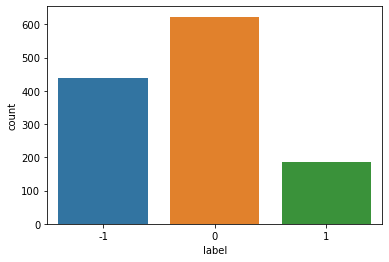

In [53]:
#to visualise labels count
sns.countplot(df_sia.label)

We could pre-process data for stopwords that possibly hinder the prediction process, given that stopwords add no meaning whatsoever to the sentence individually. 

In [54]:
from sklearn.model_selection import train_test_split
training_data,testing_data =  train_test_split(df_sia_label,test_size=0.2)  
# 80% training data

The dataset has been split into 80% training data to later train the machine learning model.

In [55]:
training_data

,headlines,label
783,some u.s. states are reducing daily reporting ...,-1
1134,coronavirus deaths in the u.s. fall to their l...,-1
243,supreme court sides with f.b.i. in case on spy...,1
1074,colorado jury awards $14 million to demonstrat...,0
54,"dottie frazier, a pioneer in diving the deep s...",0
...,...,...
486,russia-ukraine talks come to nothing as bombar...,0
473,"facing economic calamity, putin talks of natio...",0
141,officer in breonna taylor raid says he mistook...,0
837,who is judge ketanji brown jackson?,0


In [56]:
corpus = text_transformation(training_data['headlines'])

- Creating a wordcloud could of tremendous help to visualise the sort of words that have been commonly used in the headlines. This user defined function eliminates the stopwords used in the headlines

In [57]:

cloud = ""
for row in corpus:
    for word in row:
        cloud+= " ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(cloud)


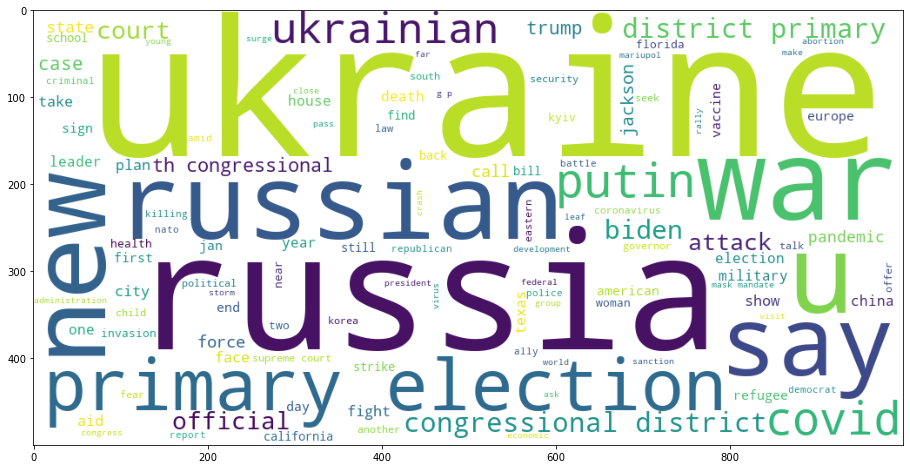

In [58]:
plt.rcParams['figure.figsize'] = 20,8
plt.imshow(wordcloud)

During the month of March, as shown here, the buzzword was through and through the emergence of war against Ukraine by Russia. Refugees fleeing into neighbouring countries who've been a part of NATO sought for military support against Putin's hostility. 
- Although majority of articles through out the month focused on the Russian-Ukrainian war, the election held in Texas
- Abortion laws
- corona virus
- economy 
- and many other topics that required dire attention were pushed to the back seat. 

In [61]:
df_cleaned = pd.DataFrame(training_data['headlines'])
df_cleaned['cleaned'] = corpus

In [62]:
df_cleaned

,headlines,cleaned
783,some u.s. states are reducing daily reporting ...,u state reducing daily reporting coronavirus d...
1134,coronavirus deaths in the u.s. fall to their l...,coronavirus death u fall lowest point since su...
243,supreme court sides with f.b.i. in case on spy...,supreme court side f b case spying muslim
1074,colorado jury awards $14 million to demonstrat...,colorado jury award million demonstrator injur...
54,"dottie frazier, a pioneer in diving the deep s...",dottie frazier pioneer diving deep sea dy
...,...,...
486,russia-ukraine talks come to nothing as bombar...,russia ukraine talk come nothing bombardment c...
473,"facing economic calamity, putin talks of natio...",facing economic calamity putin talk nationaliz...
141,officer in breonna taylor raid says he mistook...,officer breonna taylor raid say mistook police...
837,who is judge ketanji brown jackson?,judge ketanji brown jackson


In [66]:
results_cleaned =[]

for line in corpus:
    pol_score = sia.polarity_scores(line)
    pol_score['cleaned']= line
    results_cleaned.append(pol_score)


print(results_cleaned[:3])
    

[{'neg': 0.424, 'neu': 0.576, 'pos': 0.0, 'compound': -0.7096, 'cleaned': 'u state reducing daily reporting coronavirus data raising fear blind spot'}, {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.7579, 'cleaned': 'coronavirus death u fall lowest point since summer'}, {'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'compound': 0.5574, 'cleaned': 'supreme court side f b case spying muslim'}]


In [67]:
cleaned_score = pd.DataFrame.from_records(results_cleaned)

In [68]:
cleaned_score

,neg,neu,pos,compound,cleaned
0,0.424,0.576,0.000,-0.7096,u state reducing daily reporting coronavirus d...
1,0.565,0.435,0.000,-0.7579,coronavirus death u fall lowest point since su...
2,0.000,0.581,0.419,0.5574,supreme court side f b case spying muslim
3,0.331,0.423,0.246,-0.0516,colorado jury award million demonstrator injur...
4,0.000,0.822,0.178,0.0772,dottie frazier pioneer diving deep sea dy
...,...,...,...,...,...
994,0.000,1.000,0.000,0.0000,russia ukraine talk come nothing bombardment c...
995,0.000,1.000,0.000,0.0000,facing economic calamity putin talk nationaliz...
996,0.216,0.784,0.000,-0.2960,officer breonna taylor raid say mistook police...
997,0.000,1.000,0.000,0.0000,judge ketanji brown jackson


In [69]:
cleaned_score['label'] = 0
cleaned_score.loc[cleaned_score['compound']>0.3,'label']=1
cleaned_score.loc[cleaned_score['compound'] < -0.3, 'label'] = -1
cleaned_score.head()

,neg,neu,pos,compound,cleaned,label
0,0.424,0.576,0.000,-0.7096,u state reducing daily reporting coronavirus d...,-1
1,0.565,0.435,0.000,-0.7579,coronavirus death u fall lowest point since su...,-1
2,0.000,0.581,0.419,0.5574,supreme court side f b case spying muslim,1
3,0.331,0.423,0.246,-0.0516,colorado jury award million demonstrator injur...,0
4,0.000,0.822,0.178,0.0772,dottie frazier pioneer diving deep sea dy,0


In [72]:
cleaned_counts = cleaned_score.label.value_counts(normalize=True)*100

In [76]:
headlines_counts = training_data.label.value_counts(normalize=True)*100

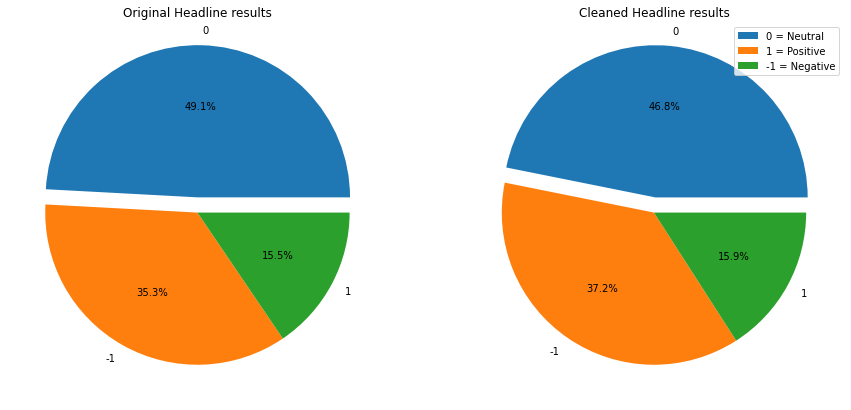

In [77]:
%matplotlib inline 


plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Original Headline results")
plt.pie(headlines_counts,labels= headlines_counts.index, explode=(0.1, 0, 0), autopct='%1.1f%%', shadow=False)
plt.subplot(1,2,2)
plt.title('Cleaned Headline results')
plt.pie(cleaned_counts,labels= cleaned_counts.index, explode=(0.1, 0, 0), autopct='%1.1f%%', shadow=False)
plt.legend(['0 = Neutral','1 = Positive','-1 = Negative'])


# Data Preprocessing

Tokenisation is the process of breaking a stream of text up into meaningful elements called tokens. You can tokenise a paragraph into sentences, a sentence into words and so on. Tokenisation of the headlines is one of the basic steps to get a clearer understanding of what the data is conveying.

Using Count Vectorisation module is method that collects all the words into a bag. It is exactly as it sounds. BAG OF WORDS. 

This method separates the strings into tokens, as I had previously mentioned. This is primarily done to exclude the stopwords and notice a pattern in the text data. This method is called an 'n-gram', as it splits the text into separate string columns. 

CountVectorizer() takes the array of strings and tokenises it. It builds its vocabulary (BOW) of all the words that appear and counts its occurrences. 
- It is also important to note that the computer does not read text data, hence it is converted into vectors to be fed into the model. 

In [63]:
corpus[10]

'council europe suspends russia attack ukraine'

In [64]:
cv= CountVectorizer(ngram_range=(1,2))
#signifies the minimum limit as a unigram and upper limit as bigram
rfc = RandomForestClassifier()


In [65]:
bag_of_words = cv.fit_transform(corpus)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <999x8156 sparse matrix of type '<class 'numpy.int64'>'
	with 13381 stored elements in Compressed Sparse Row format>


- The transform method is called to form a training data representation

In [66]:
X= bag_of_words
y= training_data['label']

# Machine Learning 

In [67]:
#CREATE A PARAMETER GRID FOR HYPERPARAMETERS TO BE USED
param_grid = {'max_features':['auto','sqrt'],
             'n_estimators': [500,1000],
             'max_depth':[10,None],
             'min_samples_split': [5],
             'min_samples_leaf': [1],
             'bootstrap': [True]}

Training a the Random Forest Classifier model using hyperparameter tuning- GridSearchCV

Parameters for grid search to focus on are :
- Estimator/model
- Parameters to be used - param_grid
- Cross validation
- Return train score - Computing training scores is used to get insights on how different parameter settings impact the overfitting/underfitting trade-off. 
- n_jobs - specifies the number of processors that would run in parallel. Hence, significantly reducing the run time. 

In [68]:
#USING GridSearchCV() for selecting the best parameters to train the model/estimator
grid_search = GridSearchCV(RandomForestClassifier(),param_grid,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [5],
                         'n_estimators': [500, 1000]},
             return_train_score=True)

In [69]:
for i in range(6):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.5245276381909547
Rank:  5
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Mean Test Score:  0.5225276381909547
Rank:  7
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.5215175879396985
Rank:  8
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Mean Test Score:  0.5245276381909547
Rank:  5
Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.6366231155778894
Rank:  4
Parameters:  {'bootstrap': True, 'max_depth': None, 'max

In [70]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])

In [71]:
rfc.fit(X,y)

RandomForestClassifier(max_features='sqrt', min_samples_split=5,
                       n_estimators=500)

* Using test data to transform and predict 

# Test Data Transformation

In [75]:
X_test,y_test = testing_data.headlines,testing_data.label

In [76]:
#corpus for testing_data
t_corpus = text_transformation(X_test)

In [78]:
#count vectorised test corpus
test = cv.transform(t_corpus)

In [79]:
#predicting target
predictions = rfc.predict(test)

In [82]:
predictions

array([-1,  0,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  1,
        0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0, -1, -1, -1,  0,  0, -1,
       -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  1, -1,  0, -1, -1,  0, -1,
        0,  0,  1,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  0,  0

In [83]:
pred_prob = rfc.predict_proba(test)

In [84]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ValueError: multiclass format is not supported

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

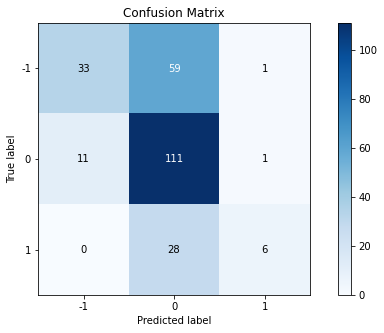

In [80]:
plt.rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print('-------------------------------------------------------------------')
cr = classification_report(y_test,predictions)
print(cr)

What I had failed to realise earlier in this project is that the text scraped from NYT's API is subjected to unsupervised machine learning. It may possibly come under the said category due to the absence of predefined labels in the dataset, consequently pushing us to check for polarity score, or namely a 'Lexicon-based' approach. 

It polarises the text into positive (1), negative (-1), and neutral (0). As I have already computed the polarity scores for the texts and displayed the word cloud for the headlines using VADER sentiment analysis.

Through the errors displayed towards the end of the prediction, I now reckon that a classification problem caters only to binary labels and not multilabel-classifications. Hence, causing an error.